In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['day']=le.fit_transform(df['day'])
df['time']=le.fit_transform(df['time'])

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


# Splitting dataset into X and Y

In [9]:
x=df.drop('tip',axis=1)
y=df['tip']

In [10]:
x

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4
...,...,...,...,...,...,...
239,29.03,1,0,1,0,3
240,27.18,0,1,1,0,2
241,22.67,1,1,1,0,2
242,17.82,1,0,1,0,2


In [11]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

# Applying Scaling on X

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale=MinMaxScaler()

In [14]:
x=scale.fit_transform(x)


In [15]:
x

array([[0.29157939, 0.        , 0.        , 0.66666667, 0.        ,
        0.2       ],
       [0.1522832 , 1.        , 0.        , 0.66666667, 0.        ,
        0.4       ],
       [0.3757855 , 1.        , 0.        , 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.41055718, 1.        , 1.        , 0.33333333, 0.        ,
        0.2       ],
       [0.30896523, 1.        , 0.        , 0.33333333, 0.        ,
        0.2       ],
       [0.32907415, 0.        , 0.        , 1.        , 0.        ,
        0.2       ]])

# Splitting X and Y in train and Test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Model Building

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(x_test)

# Evaluation metrics

In [21]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [22]:
error=y_test-y_pred

In [23]:
error

64    -0.268407
63     0.694602
55     0.762951
111   -0.476576
225   -0.238789
         ...   
90    -0.668911
101    0.591909
75    -0.783550
4     -0.036714
109    1.789722
Name: tip, Length: 74, dtype: float64

In [24]:
se=error*error

In [25]:
se

64     0.072042
63     0.482472
55     0.582094
111    0.227124
225    0.057020
         ...   
90     0.447442
101    0.350356
75     0.613951
4      0.001348
109    3.203105
Name: tip, Length: 74, dtype: float64

In [26]:
mse=np.mean(se)

In [27]:
mse

0.9166571859645408

In [28]:
mse2=mean_squared_error(y_test,y_pred)

In [29]:
mse2

0.9166571859645408

In [30]:
mae=mean_absolute_error(y_test,y_pred)

In [31]:
mae

0.7166503728723608

In [32]:
rmse=np.sqrt(mse2)

In [33]:
rmse

0.9574221566083275

In [34]:
r2=r2_score(y_test,y_pred)

In [35]:
r2

0.4687997604863058

# Classification Metrics

In [37]:
data=sns.load_dataset('titanic')

In [38]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
data['age'].fillna(data['age'].median(),inplace=True)

In [41]:
data['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [42]:
data['deck'].fillna(data['deck'].mode()[0],inplace=True)

In [43]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [44]:
data.dropna(how='any',inplace=True)

In [45]:
data.shape

(889, 15)

In [46]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [47]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [48]:
data.drop('embark_town',axis=1,inplace=True)

In [49]:
data['sex']=le.fit_transform(data['sex'])
data['embarked']=le.fit_transform(data['embarked'])
data['class']=le.fit_transform(data['class'])
data['who']=le.fit_transform(data['who'])
data['adult_male']=le.fit_transform(data['adult_male'])
data['deck']=le.fit_transform(data['deck'])
data['alive']=le.fit_transform(data['alive'])
data['alone']=le.fit_transform(data['alone'])


In [50]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [51]:
x=data.drop('survived',axis=1)
y=data['survived']


In [52]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,0,38.0,1,0,71.2833,0,0,2,0,2,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,1,1,1,2,0,1
887,1,0,19.0,0,0,30.0000,2,0,2,0,1,1,1
888,3,0,28.0,1,2,23.4500,2,2,2,0,2,0,0
889,1,1,26.0,0,0,30.0000,0,0,1,1,2,1,1


In [53]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [54]:
x=scale.fit_transform(x)

In [55]:
x

array([[1.        , 1.        , 0.27117366, ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.33333333, 1.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.33333333, 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.34656949, ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 1.        , 0.32143755, ..., 0.33333333, 1.        ,
        1.        ],
       [1.        , 1.        , 0.39683338, ..., 0.33333333, 0.        ,
        1.        ]])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [57]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()

In [58]:
lor.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred=lor.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_recall_fscore_support,f1_score,roc_curve,classification_report

In [61]:
accuracy_score(y_test,y_pred)

1.0

In [62]:
confusion_matrix(y_test,y_pred)

array([[157,   0],
       [  0, 110]])

In [63]:
pr=precision_recall_fscore_support(y_test,y_pred, average='micro')

In [64]:
pr

(1.0, 1.0, 1.0, None)

In [65]:
f1_score(y_test,y_pred)

1.0

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       110

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [67]:
roc=roc_auc_score(y_test,y_pred)

In [68]:
roc

1.0

Text(0, 0.5, 'Ture Positive Rate')

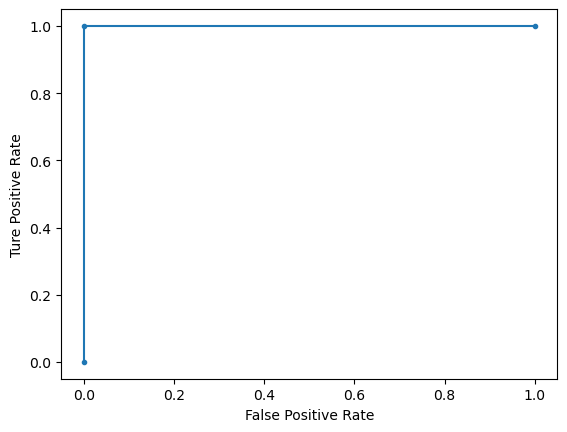

In [69]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')